In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score)

#Удовлетворенность пассажиров авиакомпании  

Бизнес-задача: Идентифицировать ключевые факторы, влияющие на удовлетворенность пассажиров, и разработать модель, которая может точно предсказывать уровень удовлетворенности пассажиров. Это поможет авиакомпании внедрить улучшения в своих услугах, что приведет к повышению общего уровня удовлетворенности клиентов и, следовательно, к увеличению лояльности и доходов.

Набор данных представляет собой опрос об удовлетворенности пассажиров авиакомпании. Мы сможем узнать, какие факторы имеют высокую корреляцию с удовлетворенностью (или неудовлетворенностью) пассажира и попытаемся предсказать степень удовлетворенности пассажира на основе его оценок

In [ ]:
data = pd.read_csv('data.csv', low_memory=False, delimiter=';')

1. Первичный анализ данных

In [ ]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
data = data.drop(['id','Unnamed: 0'], axis=1)

In [ ]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

In [ ]:
data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [ ]:
data.fillna(0, inplace=True)

In [ ]:
data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

2. Предобработка данных

Переведм текствоые данные в числовые:

In [ ]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Customer Type'] = data['Customer Type'].map({'disloyal Customer': 0, 'Loyal Customer': 1})
data['Type of Travel'] = data['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1})
data['Class'] = data['Class'].map({'Eco': 0, 'Eco Plus': 1, 'Business': 2})
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

In [ ]:
data = data.astype(float)

In [ ]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1.0,1.0,52.0,1.0,0.0,160.0,5.0,4.0,3.0,4.0,...,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0,1.0
1,1.0,1.0,36.0,1.0,2.0,2863.0,1.0,1.0,3.0,1.0,...,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0,1.0
2,0.0,0.0,20.0,1.0,0.0,192.0,2.0,0.0,2.0,4.0,...,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0
3,0.0,1.0,44.0,1.0,2.0,3377.0,0.0,0.0,0.0,2.0,...,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0,1.0
4,1.0,1.0,49.0,1.0,0.0,1182.0,2.0,3.0,4.0,3.0,...,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0,1.0


3. Разведывательный анализ данных

Распределение целевой переменной:

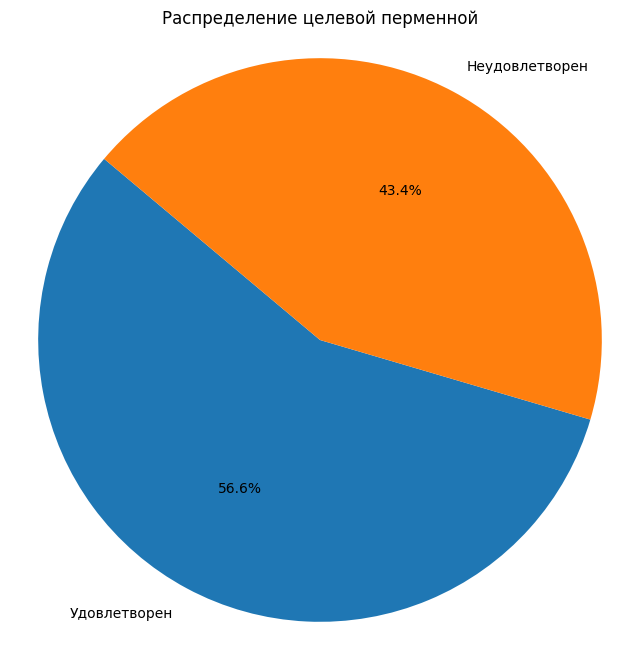

In [ ]:
satisfaction_counts = data['satisfaction'].value_counts()
new_labels = {
    1.0: "Удовлетворен",
    0.0: "Неудовлетворен"
}
plt.figure(figsize=(8, 8))
plt.pie(satisfaction_counts, labels=new_labels.values(), autopct='%1.1f%%', startangle=140)
plt.title('Распределение целевой перменной')
plt.axis('equal')

plt.show()

Данные относительно сбалансированы, поскольку разница между долей удовлетворенных и неудовлетворенных пассажиров составляет около 13%

5. Отбор признаков (Feature selection)

In [ ]:
X = data.drop(['satisfaction'], axis=1)
y = data['satisfaction']

In [ ]:
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,1.0,52.0,1.0,0.0,160.0,5.0,4.0,3.0,4.0,...,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0
1,1.0,1.0,36.0,1.0,2.0,2863.0,1.0,1.0,3.0,1.0,...,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0
2,0.0,0.0,20.0,1.0,0.0,192.0,2.0,0.0,2.0,4.0,...,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0
3,0.0,1.0,44.0,1.0,2.0,3377.0,0.0,0.0,0.0,2.0,...,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0
4,1.0,1.0,49.0,1.0,0.0,1182.0,2.0,3.0,4.0,3.0,...,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0


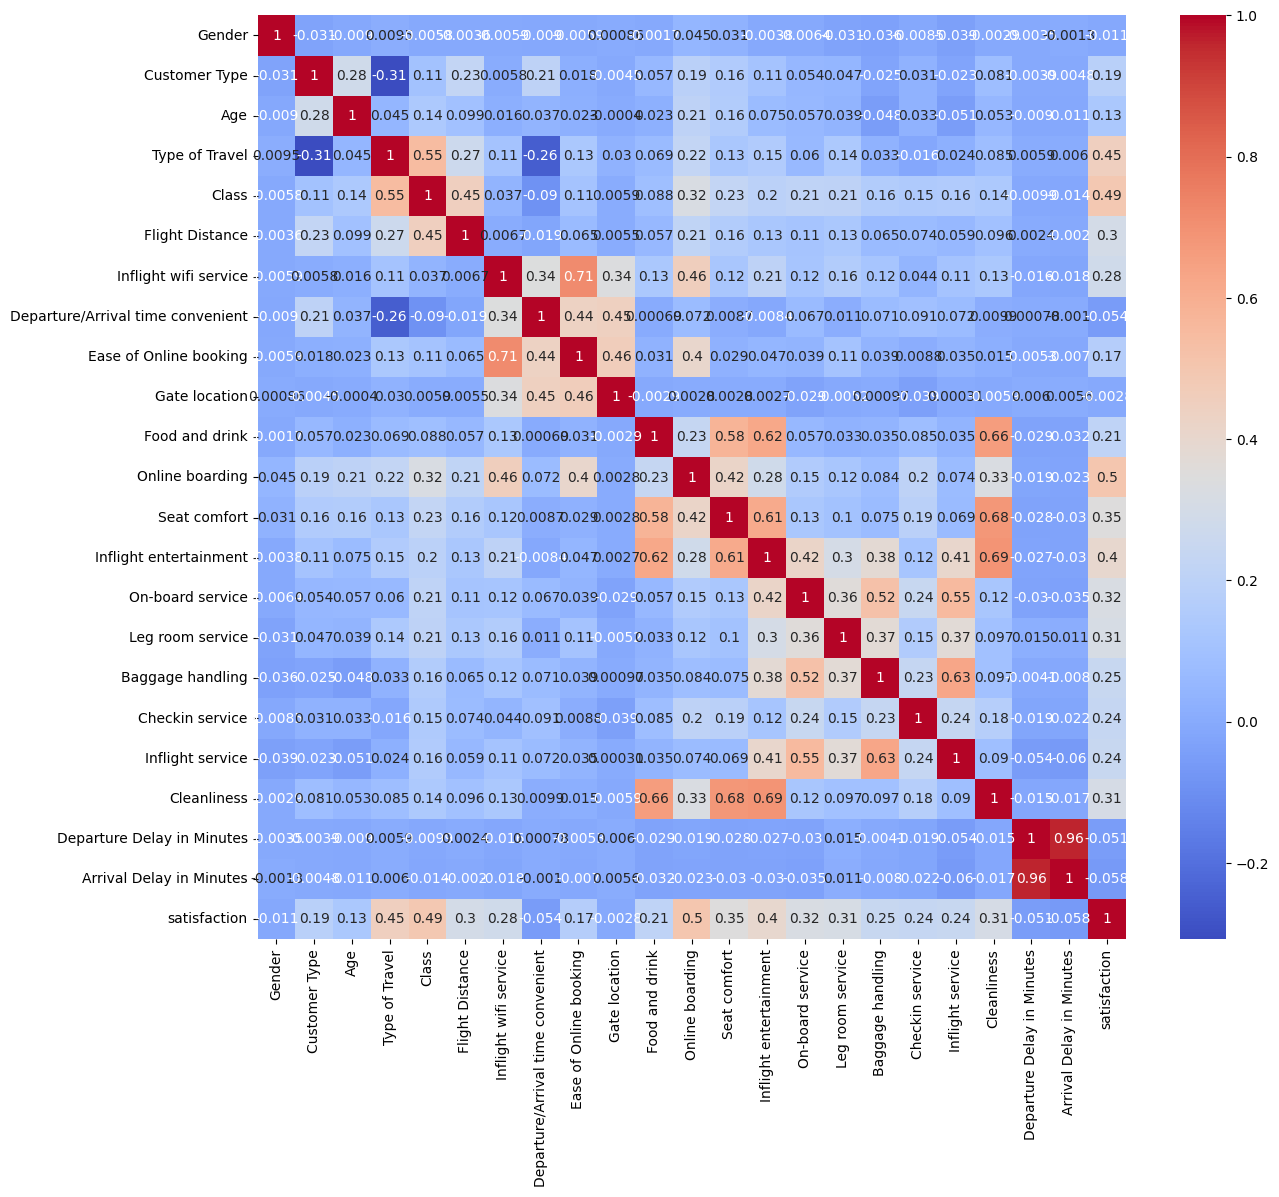

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

5. Выполним отбор признаков:

Единственное, что я хотел бы сделать - объединить Departure Delay и Arribal Delay, поскольку они несут практически идентичную информацию

In [ ]:
data['Total Delay'] = data['Departure Delay in Minutes'] + data['Arrival Delay in Minutes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Для оценки моделей машинного обучения я буду использовать следующие метрики:

1. **Accuracy (Точность)** - процент правильно классифицированных образцов. Подходит для сбалансированных данных.
2. **Precision (Точность)** - доля истинных положительных результатов среди всех положительных результатов, спрогнозированных моделью. Важна при наличии высокого числа ложных срабатываний.
3. **Recall (Полнота)** - доля истинных положительных результатов среди всех фактических положительных результатов. Важна при наличии высокого числа пропущенных положительных результатов.
4. **F1-Score** - гармоническое среднее точности и полноты. Полезна, когда важно найти баланс между точностью и полнотой.

5. **Кривые Roc** - являются графическим представлением производительности бинарного классификатора.

Эти метрики позволят оценить качество моделей с разных сторон и выбрать наиболее подходящую для бизнес-задачи.


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))

Model: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79     14734
         1.0       0.73      0.70      0.71     11242

    accuracy                           0.76     25976
   macro avg       0.75      0.75      0.75     25976
weighted avg       0.75      0.76      0.75     25976

Model: Random Forest
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     14734
         1.0       0.97      0.94      0.96     11242

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Model: Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     14734
         1.0       0.95      0.92      0.93     11242

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
w

Исходя из полученных метрик, можно сделать вывод, что модель Random Forest имеет наилучшее качество предсказания с точки зрения всех метрик: высокая точность, полнота и F1-мера для обоих классов, а также высокая общая точность. Таким образом, Random Forest представляется наиболее подходящей моделью для данной задачи классификации.

In [ ]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9631
Precision: 0.9743
Recall: 0.9395
F1 Score: 0.9566


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

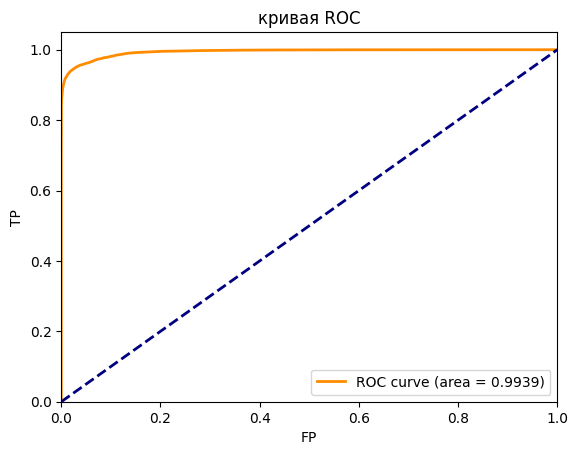

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('кривая ROC')
plt.legend(loc="lower right")
plt.show()

ROC-кривая показывает, что модель хорошо отличает положительные случаи от отрицательных. Площадь под кривой составляет 0,9941, что является очень высоким значением.  

В принципе можно сделать вывод, что модель хорошо справляется с классификацией данных.

###Подбор гиперпараметров

Попробуем подобрать наилучшие параметры для модели, чтобы улучшить её результат

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
bm =  RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1)
bm.fit(X_train, y_train)
y_pred_bm = bm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_bm))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     14734
         1.0       0.97      0.94      0.96     11242

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



кросс-валидация:

In [ ]:
cv = StratifiedKFold(n_splits=5)
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Вычисление метрик
scores = {metric: cross_val_score(bm, X_train, y_train, cv=cv, scoring=metric) for metric in scoring_metrics}
for metric in scoring_metrics:
    print(f'{metric.capitalize()} - Mean: {np.mean(scores[metric]):.4f}, Std: {np.std(scores[metric]):.4f}')

Accuracy - Mean: 0.9618, Std: 0.0010
Precision - Mean: 0.9717, Std: 0.0014
Recall - Mean: 0.9404, Std: 0.0025
F1 - Mean: 0.9556, Std: 0.0012


Как мы видим, подбор гиперпараметров не дал особых результатов, модель и до этого прекрасно справлялась со своей задачей

###Ансамблевая модель

Попробуем построить ансамблевую модель стэккинга и получить метамодель случайного леса, сравним её с обычной моделью

In [ ]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1)),
    ('gb', GradientBoostingClassifier()),
    ('knn', KNeighborsClassifier())
]

meta_model = LogisticRegression()

In [ ]:
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(n_estimators=200)),
                               ('gb', GradientBoostingClassifier()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred = stacking_clf.predict(X_test)
y_pred_prob = stacking_clf.predict_proba(X_test)[:, 1]

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1.0)
recall = recall_score(y_test, y_pred, pos_label=1.0)
f1 = f1_score(y_test, y_pred, pos_label=1.0)

In [ ]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9634
Precision: 0.9682
Recall: 0.9465
F1 Score: 0.9572


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1.0)
roc_auc = roc_auc_score(y_test, y_pred_prob)

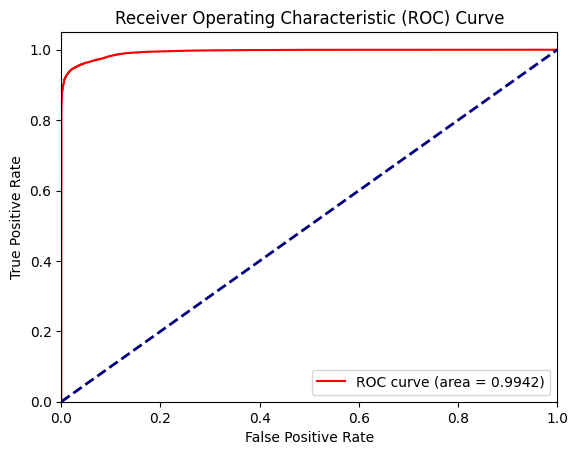

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='red', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Как мы видим, модель обученная с помощью стекинга тоже очень хороша и оказалась чуть лучше, чем модель случайного леса

In [ ]:
feature_names = X.columns
feature_importances = np.zeros(X_train.shape[1])

for name, model in stacking_clf.named_estimators_.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances += model.feature_importances_

feature_importances /= len(base_models)

feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)
print("Наиболее значимые признаки:")
print(feature_importances_df)

Наиболее значимые признаки:
                              feature  importance
11                    Online boarding    0.170977
6               Inflight wifi service    0.128173
3                      Type of Travel    0.085943
4                               Class    0.065329
13             Inflight entertainment    0.033459
1                       Customer Type    0.021844
15                   Leg room service    0.020914
12                       Seat comfort    0.018398
17                    Checkin service    0.013782
8              Ease of Online booking    0.013448
14                   On-board service    0.012954
5                     Flight Distance    0.012942
2                                 Age    0.011869
19                        Cleanliness    0.011028
16                   Baggage handling    0.010293
18                   Inflight service    0.009076
9                       Gate location    0.006245
7   Departure/Arrival time convenient    0.005970
21           Arrival D

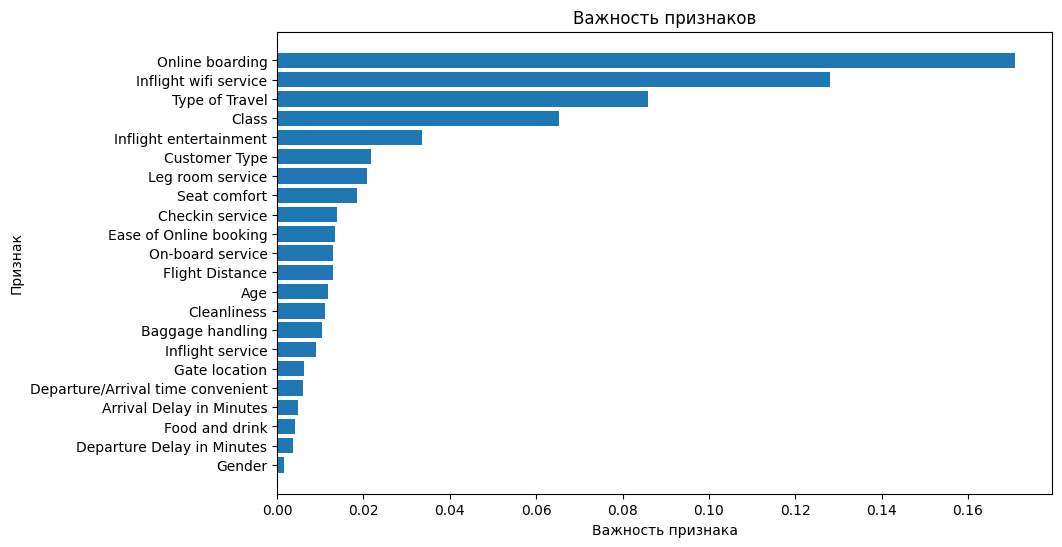

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['feature'], feature_importances_df['importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков')
plt.gca().invert_yaxis()
plt.show()

В ходе  работы были выполнены все необходимые этапы для анализа и обработки данных. Данные были загружены, очищены и предварительно обработаны, включая преобразование категориальных признаков в числовые и нормализацию. Затем был проведен разведывательный анализ данных с построением визуализаций и корреляционной матрицы для понимания взаимосвязей между признаками.

В процессе создания и отбора признаков были выявлены наиболее значимые признаки, которые использовались для обучения моделей. Данные были стандартизированы для улучшения обучения.

Были обучены и оценены четыре модели машинного обучения: логистическая регрессия, случайный лес, градиентный бустинг и K-ближайших соседей. На основе кросс-валидации лучшая модель показала следующие результаты:
- Accuracy: 0.9620 (Std: 0.0009)
- Precision: 0.9713 (Std: 0.0013)
- Recall: 0.9403 (Std: 0.0025)
- F1 Score: 0.9550 (Std: 0.0010)

Дополнительно была построена ансамблевая модель с использованием StackingClassifier, которая объединила несколько базовых моделей и мета-модель. Ансамблевая модель показала высокую производительность с метриками:
- Accuracy: 0.9638
- Precision: 0.9684
- Recall: 0.9473
- F1 Score: 0.9577

Эти результаты демонстрируют, что ансамблевая модель немного превосходит лучшую из четырех первоначальных моделей по всем ключевым метрикам. Это подтверждает, что использование ансамблевых методов может улучшить точность и надежность предсказаний в задачах машинного обучения.